# Import Library

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Cleaning Data

In [5]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [7]:
miss_values = df[df['TotalCharges'].isnull()].index.to_list()
df.loc[df.index.isin(miss_values), 'TotalCharges'] = df.loc[df.index.isin(miss_values), 'MonthlyCharges']

In [8]:
miss_values

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [9]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
df.duplicated().any()

False

ada missing value pada kolom TotalCharges

Tidak ada duplicated data

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# EDA

In [12]:
num_cols= list(df.select_dtypes('number'))
cat_cols= list(df.select_dtypes(object).drop(columns = ['customerID']).columns)

In [13]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [14]:
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [15]:
df[cat_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


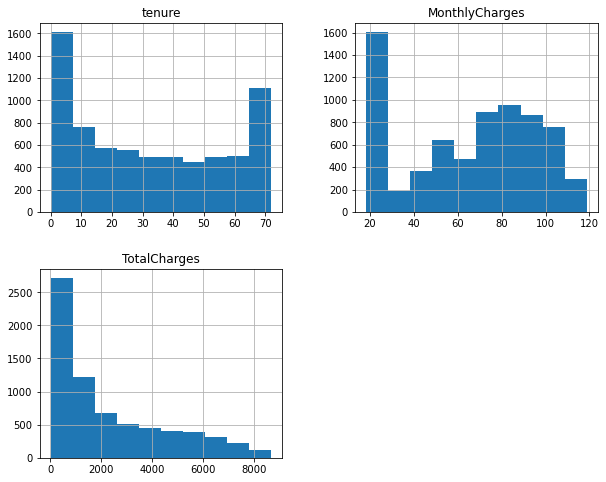

In [16]:
plot = df[num_cols]
plot.hist(figsize=(10,8));

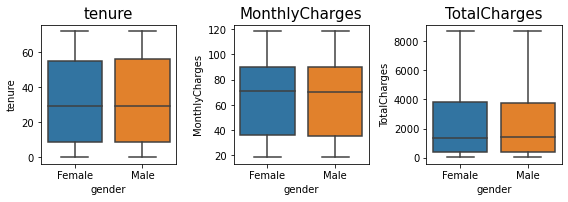

In [17]:
plt.figure(figsize = (8, 5))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i + 1)
    sns.boxplot(y = df[num_cols[i]], x = df['gender'])
    plt.title(num_cols[i], fontsize = 15)
plt.tight_layout()
plt.show()

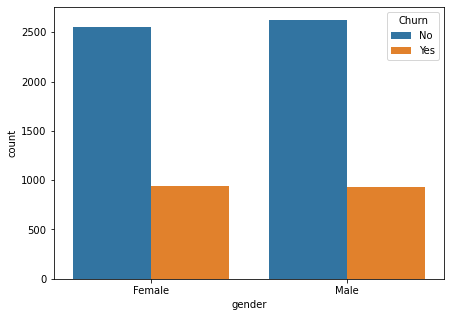

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='gender', hue='Churn');

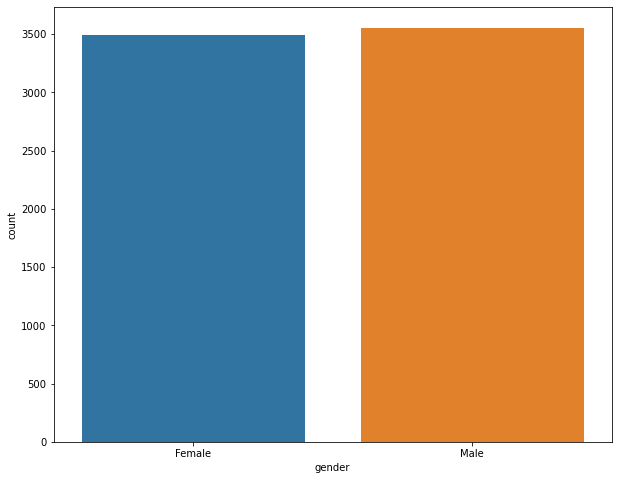

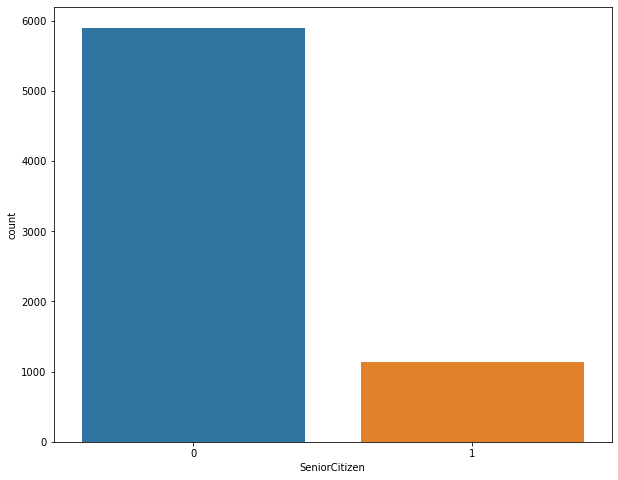

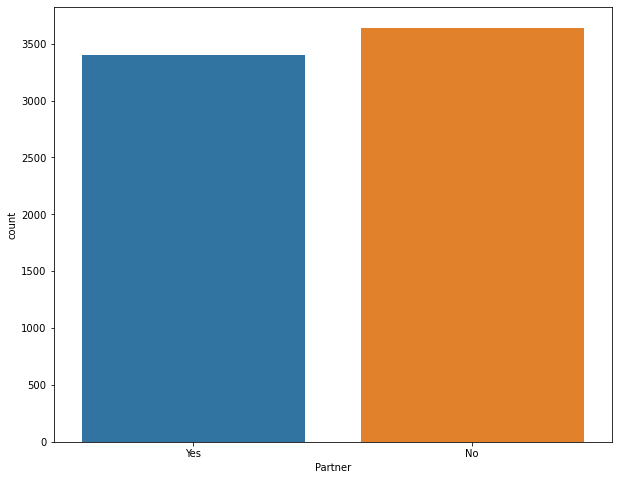

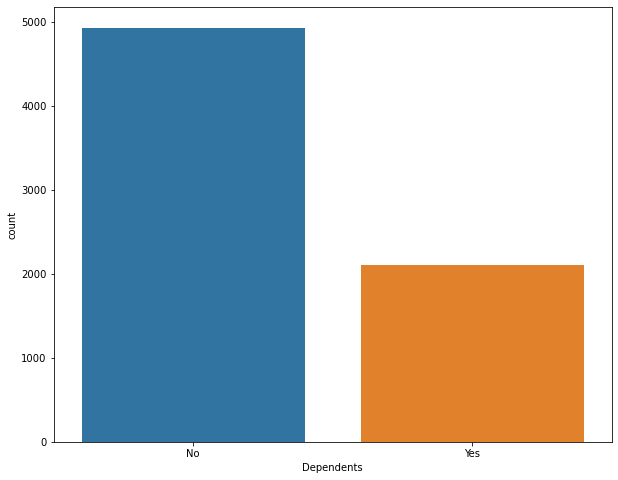

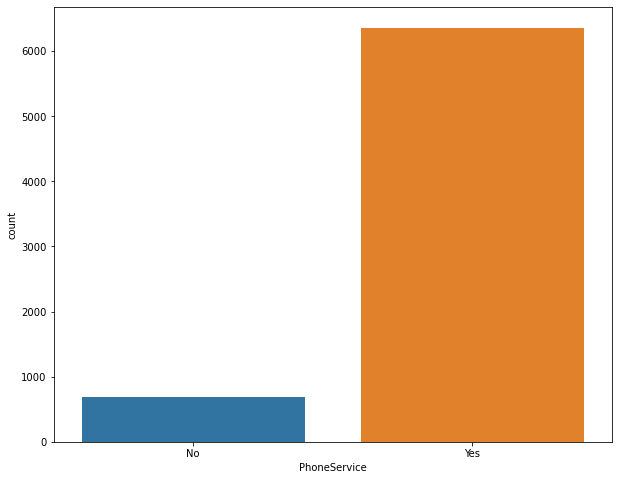

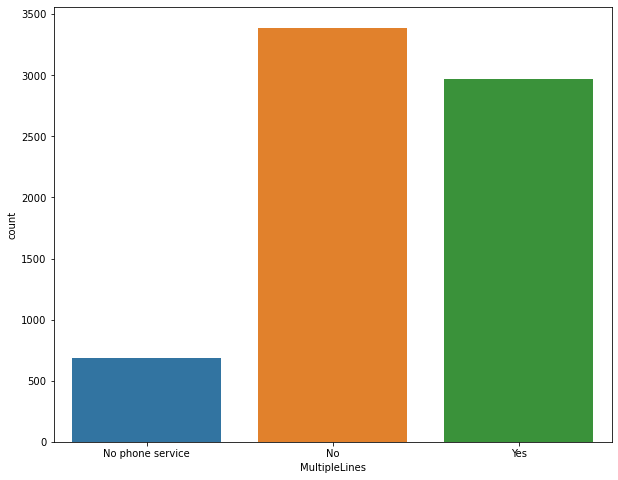

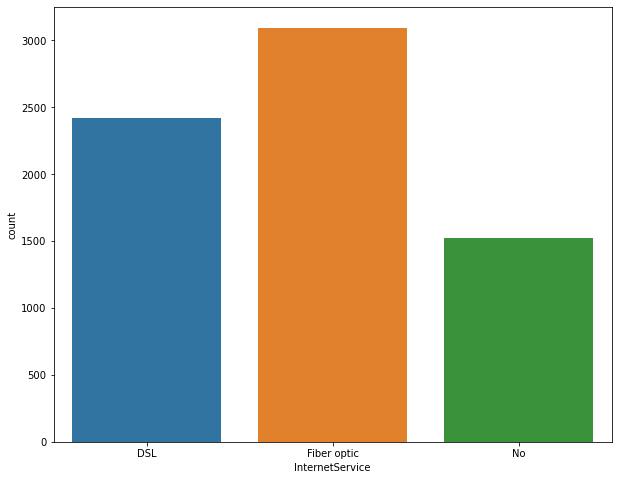

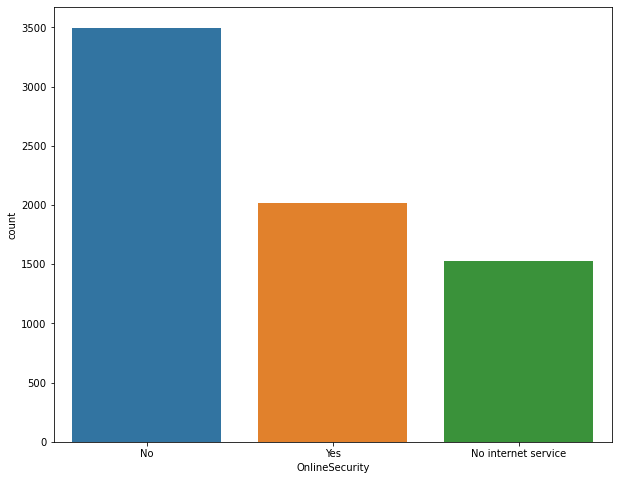

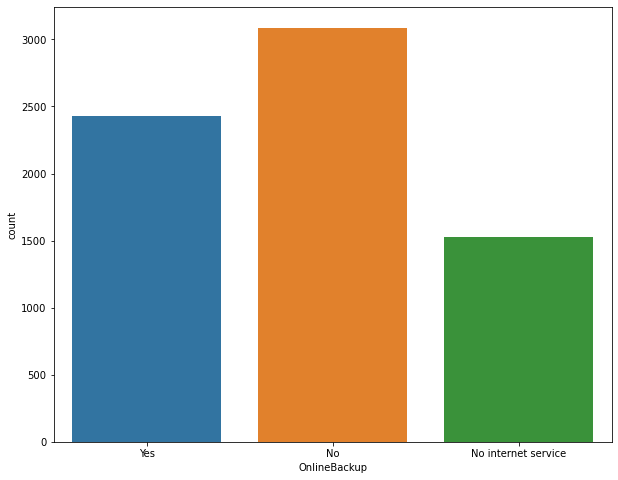

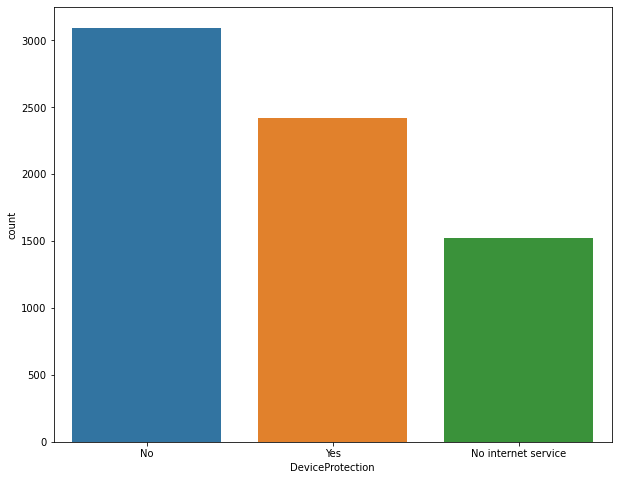

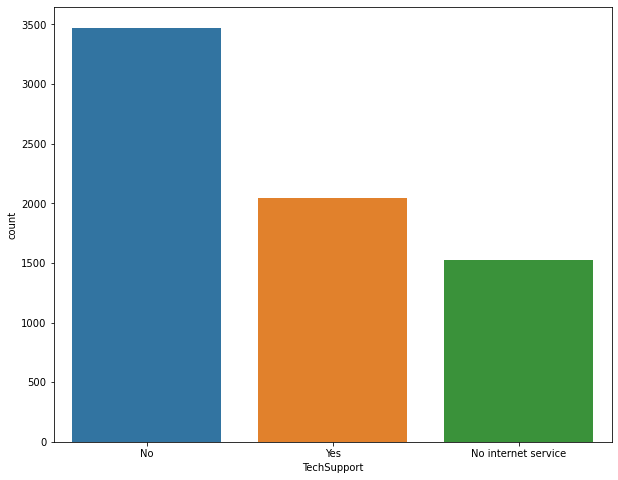

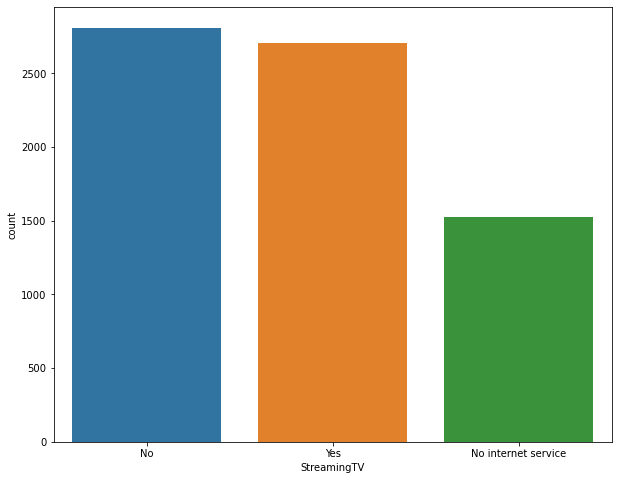

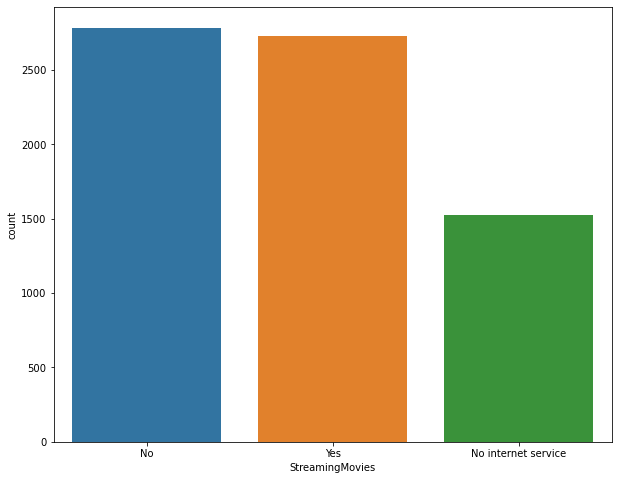

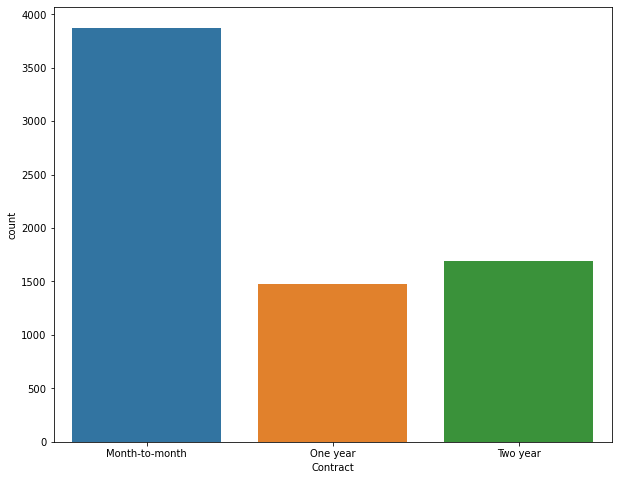

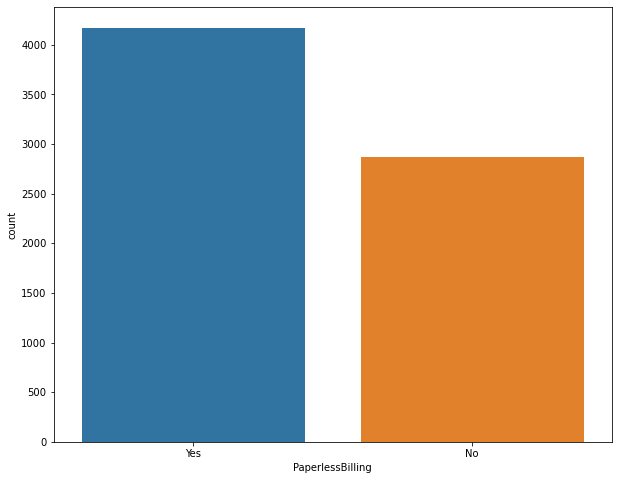

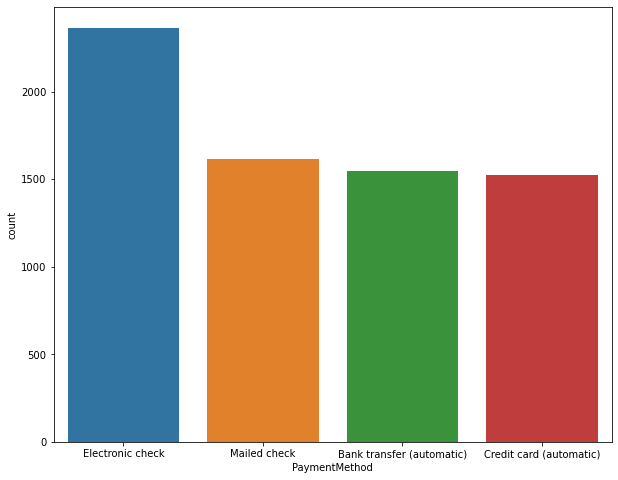

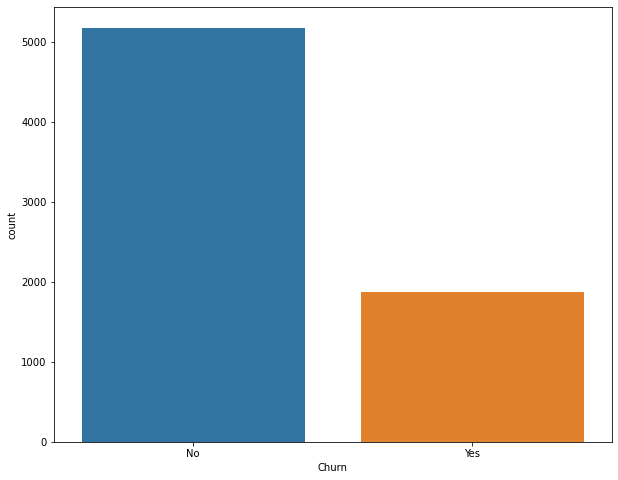

In [19]:
for i in cat_cols:
    plt.figure(figsize=(10,8))
    ax = sns.countplot(
        x = df[i]
    )
    plt.show()

<AxesSubplot:>

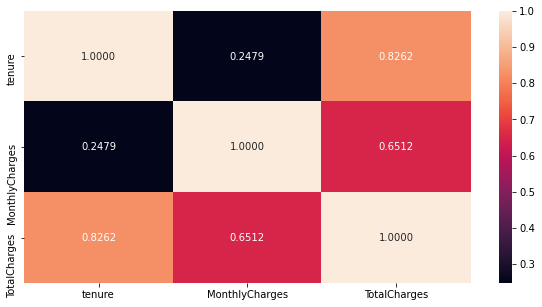

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt='.4f')

# Feature Engineering

In [21]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['SeniorCitizen'] = le.fit_transform(df['SeniorCitizen'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

In [22]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,1,0,0,1,0
InternetService,0,0,0,0,1
OnlineSecurity,0,2,2,2,0


In [23]:
X = df.drop(columns = ['customerID','Churn'])
y = df["Churn"]

In [24]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


## Split Data

In [25]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Pipeline untuk standardscaler

In [27]:
pipe= Pipeline([("scaler",  StandardScaler())])

In [28]:
X_train_trf=pipe.fit_transform(X_train)
X_valid_trf = pipe.transform(X_valid)
X_test_trf = pipe.transform(X_test)

# Modeling

## Model Sequential

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation="relu", input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))

## Model Functional API

In [30]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(20, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(10, activation="relu")(hidden2)
concat = keras.layers.concatenate([input_,hidden3])
output = keras.layers.Dense(2)(concat)
model1 = keras.models.Model(inputs=[input_], outputs=[output])

### Summary Model

In [31]:
# Summary moodel sequential
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Summary Functional API
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 19)]         0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           600         input_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 20)           620         dense_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 10)           210         dense_5[0][0]                    
______________________________________________________________________________________________

# Training Model

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train_trf, y_train, epochs=10,
                    validation_data=(X_valid_trf, y_valid))

Epoch 1/10
124/124 [==============================] - 1s 2ms/step - loss: 0.5857 - accuracy: 0.6983 - val_loss: 0.5331 - val_accuracy: 0.7350
Epoch 2/10
124/124 [==============================] - 0s 935us/step - loss: 0.5074 - accuracy: 0.7417 - val_loss: 0.4983 - val_accuracy: 0.7441
Epoch 3/10
124/124 [==============================] - 0s 985us/step - loss: 0.4836 - accuracy: 0.7475 - val_loss: 0.4804 - val_accuracy: 0.7600
Epoch 4/10
124/124 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7627 - val_loss: 0.4696 - val_accuracy: 0.7555
Epoch 5/10
124/124 [==============================] - 0s 979us/step - loss: 0.4614 - accuracy: 0.7733 - val_loss: 0.4624 - val_accuracy: 0.7676
Epoch 6/10
124/124 [==============================] - 0s 977us/step - loss: 0.4554 - accuracy: 0.7824 - val_loss: 0.4583 - val_accuracy: 0.7706
Epoch 7/10
124/124 [==============================] - 0s 969us/step - loss: 0.4512 - accuracy: 0.7844 - val_loss: 0.4552 - val_accuracy: 0.7

In [35]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["Accuracy"])
history1 = model1.fit(X_train_trf, y_train, epochs=20,
                    validation_data=(X_valid_trf, y_valid))

Epoch 1/20
124/124 [==============================] - 1s 2ms/step - loss: 4.2854 - Accuracy: 0.4819 - val_loss: 2.9581 - val_Accuracy: 0.5413
Epoch 2/20
124/124 [==============================] - 0s 899us/step - loss: 2.3193 - Accuracy: 0.5759 - val_loss: 2.0374 - val_Accuracy: 0.5927
Epoch 3/20
124/124 [==============================] - 0s 907us/step - loss: 1.7968 - Accuracy: 0.6418 - val_loss: 1.3881 - val_Accuracy: 0.6707
Epoch 4/20
124/124 [==============================] - 0s 922us/step - loss: 1.3563 - Accuracy: 0.7031 - val_loss: 1.1803 - val_Accuracy: 0.6995
Epoch 5/20
124/124 [==============================] - 0s 1ms/step - loss: 1.1863 - Accuracy: 0.7210 - val_loss: 1.1111 - val_Accuracy: 0.7131
Epoch 6/20
124/124 [==============================] - 0s 982us/step - loss: 1.0879 - Accuracy: 0.7438 - val_loss: 0.9606 - val_Accuracy: 0.7494
Epoch 7/20
124/124 [==============================] - 0s 974us/step - loss: 1.0371 - Accuracy: 0.7526 - val_loss: 0.9611 - val_Accuracy: 0.7

# Model Evaluation

In [36]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### Model Sequential

In [37]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 124}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

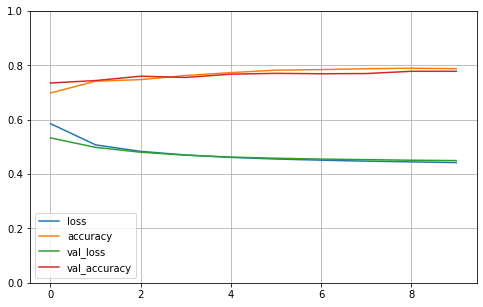

In [39]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
model.evaluate(X_test, y_test)

56/56 [==============================] - 0s 853us/step - loss: 287.0636 - accuracy: 0.7280


[287.0635986328125, 0.7279954552650452]

### Model Functional API

In [41]:
history1.params

{'verbose': 1, 'epochs': 20, 'steps': 124}

In [42]:
history1.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

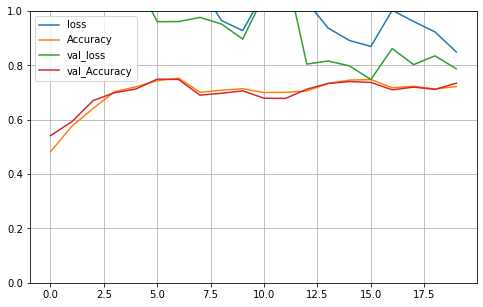

In [43]:
import matplotlib.pyplot as plt
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
model1.evaluate(X_test, y_test)

56/56 [==============================] - 0s 871us/step - loss: 0.6931 - Accuracy: 0.7280


[0.6931472420692444, 0.7279954552650452]

# Model improvement

In [45]:
def model_seq(n_hidden=1, n_neurons=25, learning_rate=3e-3, input_shape=X_train.shape[1:]):
    model = tf.keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(2, activation="sigmoid"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["Accuracy"])
    return model

In [46]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(model_seq)

### Hyperparameter Tunning

In [47]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 20).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-3).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10, cv=3, verbose=2)
history2=rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
83/83 [==============================] - 0s 2ms/step - loss: 6.3886 - Accuracy: 0.7394 - val_loss: 0.6731 - val_Accuracy: 0.7320
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6632 - Accuracy: 0.7439 - val_loss: 0.6567 - val_Accuracy: 0.7320
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6473 - Accuracy: 0.7439 - val_loss: 0.6432 - val_Accuracy: 0.7320
Epoch 4/100
83/83 [==============================] - 0s 913us/step - loss: 0.6342 - Accuracy: 0.7439 - val_loss: 0.6322 - val_Accuracy: 0.7320
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6235 - Accuracy: 0.7439 - val_loss: 0.6232 - val_Accuracy: 0.7320
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6146 - Accuracy: 0.7439 - val_loss: 0.6158 - val_Accuracy: 0.7320
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6072 - Accuracy:

83/83 [==============================] - 0s 1ms/step - loss: 0.5613 - Accuracy: 0.7539 - val_loss: 0.5517 - val_Accuracy: 0.7600
Epoch 11/100
83/83 [==============================] - 0s 949us/step - loss: 0.5592 - Accuracy: 0.7539 - val_loss: 0.5501 - val_Accuracy: 0.7608
Epoch 12/100
83/83 [==============================] - 0s 965us/step - loss: 0.5576 - Accuracy: 0.7539 - val_loss: 0.5491 - val_Accuracy: 0.7608
Epoch 13/100
83/83 [==============================] - 0s 911us/step - loss: 0.5566 - Accuracy: 0.7531 - val_loss: 0.5477 - val_Accuracy: 0.7608
Epoch 14/100
83/83 [==============================] - 0s 904us/step - loss: 0.5557 - Accuracy: 0.7535 - val_loss: 0.5466 - val_Accuracy: 0.7608
Epoch 15/100
83/83 [==============================] - 0s 921us/step - loss: 0.5550 - Accuracy: 0.7543 - val_loss: 0.5477 - val_Accuracy: 0.7615
Epoch 16/100
83/83 [==============================] - 0s 996us/step - loss: 0.5546 - Accuracy: 0.7531 - val_loss: 0.5459 - val_Accuracy: 0.7608
Epoch 1

Epoch 15/100
83/83 [==============================] - 0s 988us/step - loss: 0.5525 - Accuracy: 0.7656 - val_loss: 0.5505 - val_Accuracy: 0.7608
Epoch 16/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5494 - Accuracy: 0.7637 - val_loss: 0.5511 - val_Accuracy: 0.7608
Epoch 17/100
83/83 [==============================] - 0s 919us/step - loss: 0.5495 - Accuracy: 0.7656 - val_loss: 0.5522 - val_Accuracy: 0.7600
Epoch 18/100
83/83 [==============================] - 0s 981us/step - loss: 0.5482 - Accuracy: 0.7652 - val_loss: 0.5476 - val_Accuracy: 0.7615
Epoch 19/100
83/83 [==============================] - 0s 970us/step - loss: 0.5465 - Accuracy: 0.7656 - val_loss: 0.5483 - val_Accuracy: 0.7608
Epoch 20/100
83/83 [==============================] - 0s 937us/step - loss: 0.5472 - Accuracy: 0.7652 - val_loss: 0.5463 - val_Accuracy: 0.7608
Epoch 21/100
83/83 [==============================] - 0s 930us/step - loss: 0.5450 - Accuracy: 0.7656 - val_loss: 0.5466 - val_Accuracy: 0

Epoch 15/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5747 - Accuracy: 0.7436 - val_loss: 0.5552 - val_Accuracy: 0.7328
Epoch 16/100
83/83 [==============================] - 0s 978us/step - loss: 0.5769 - Accuracy: 0.7439 - val_loss: 0.5534 - val_Accuracy: 0.7350
Epoch 17/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5733 - Accuracy: 0.7420 - val_loss: 0.5543 - val_Accuracy: 0.7358
Epoch 18/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5721 - Accuracy: 0.7432 - val_loss: 0.5517 - val_Accuracy: 0.7328
Epoch 19/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5686 - Accuracy: 0.7413 - val_loss: 0.5498 - val_Accuracy: 0.7343
Epoch 20/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5665 - Accuracy: 0.7402 - val_loss: 0.5474 - val_Accuracy: 0.7320
Epoch 21/100
83/83 [==============================] - 0s 977us/step - loss: 0.5666 - Accuracy: 0.7417 - val_loss: 0.5456 - val_Accuracy: 0.7366
Ep

83/83 [==============================] - 0s 1ms/step - loss: 0.5804 - Accuracy: 0.7501 - val_loss: 0.5573 - val_Accuracy: 0.7578
Epoch 13/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5813 - Accuracy: 0.7531 - val_loss: 0.5545 - val_Accuracy: 0.7547
Epoch 14/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5821 - Accuracy: 0.7535 - val_loss: 0.5537 - val_Accuracy: 0.7555
Epoch 15/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5815 - Accuracy: 0.7535 - val_loss: 0.5569 - val_Accuracy: 0.7487
Epoch 16/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5801 - Accuracy: 0.7535 - val_loss: 0.5582 - val_Accuracy: 0.7517
Epoch 17/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5815 - Accuracy: 0.7505 - val_loss: 0.5616 - val_Accuracy: 0.7570
Epoch 18/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5776 - Accuracy: 0.7543 - val_loss: 0.5630 - val_Accuracy: 0.7487
Epoch 19/100
83/83 

83/83 [==============================] - 0s 1ms/step - loss: 0.5561 - Accuracy: 0.7565 - val_loss: 0.5272 - val_Accuracy: 0.7585
Epoch 70/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5566 - Accuracy: 0.7580 - val_loss: 0.6066 - val_Accuracy: 0.7593
Epoch 71/100
83/83 [==============================] - 0s 967us/step - loss: 0.5562 - Accuracy: 0.7584 - val_loss: 0.5280 - val_Accuracy: 0.7593
Epoch 72/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5525 - Accuracy: 0.7577 - val_loss: 0.5285 - val_Accuracy: 0.7593
Epoch 73/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5549 - Accuracy: 0.7588 - val_loss: 0.5308 - val_Accuracy: 0.7593
Epoch 74/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5536 - Accuracy: 0.7599 - val_loss: 0.5241 - val_Accuracy: 0.7578
Epoch 75/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5511 - Accuracy: 0.7584 - val_loss: 0.5510 - val_Accuracy: 0.7585
Epoch 76/100
83/8

83/83 [==============================] - 0s 1ms/step - loss: 0.5497 - Accuracy: 0.7774 - val_loss: 0.5356 - val_Accuracy: 0.7759
Epoch 26/100
83/83 [==============================] - 0s 982us/step - loss: 0.5456 - Accuracy: 0.7774 - val_loss: 0.5303 - val_Accuracy: 0.7805
Epoch 27/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5473 - Accuracy: 0.7739 - val_loss: 0.5303 - val_Accuracy: 0.7797
Epoch 28/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5468 - Accuracy: 0.7796 - val_loss: 0.5292 - val_Accuracy: 0.7774
Epoch 29/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5435 - Accuracy: 0.7823 - val_loss: 0.5234 - val_Accuracy: 0.7820
Epoch 30/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5463 - Accuracy: 0.7800 - val_loss: 0.5262 - val_Accuracy: 0.7843
Epoch 31/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5482 - Accuracy: 0.7755 - val_loss: 0.7479 - val_Accuracy: 0.4519
Epoch 32/100
83/8

83/83 [==============================] - 0s 1ms/step - loss: 0.5229 - Accuracy: 0.7864 - val_loss: 0.5019 - val_Accuracy: 0.7903
Epoch 83/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5184 - Accuracy: 0.7811 - val_loss: 0.5018 - val_Accuracy: 0.7805
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5240 - Accuracy: 0.7887 - val_loss: 0.5079 - val_Accuracy: 0.7790
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5216 - Accuracy: 0.7864 - val_loss: 0.4985 - val_Accuracy: 0.7812
Epoch 86/100
83/83 [==============================] - 0s 977us/step - loss: 0.5182 - Accuracy: 0.7864 - val_loss: 0.4973 - val_Accuracy: 0.7827
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5276 - Accuracy: 0.7815 - val_loss: 0.4994 - val_Accuracy: 0.7790
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5149 - Accuracy: 0.7864 - val_loss: 0.4971 - val_Accuracy: 0.7805
Epoch 89/100
83/8

83/83 [==============================] - 0s 942us/step - loss: 0.5957 - Accuracy: 0.7439 - val_loss: 0.6019 - val_Accuracy: 0.7320
Epoch 39/100
83/83 [==============================] - 0s 958us/step - loss: 0.5947 - Accuracy: 0.7439 - val_loss: 0.6010 - val_Accuracy: 0.7320
Epoch 40/100
83/83 [==============================] - 0s 921us/step - loss: 0.5937 - Accuracy: 0.7439 - val_loss: 0.6001 - val_Accuracy: 0.7320
Epoch 41/100
83/83 [==============================] - 0s 889us/step - loss: 0.5927 - Accuracy: 0.7439 - val_loss: 0.5993 - val_Accuracy: 0.7320
Epoch 42/100
83/83 [==============================] - 0s 871us/step - loss: 0.5918 - Accuracy: 0.7439 - val_loss: 0.5985 - val_Accuracy: 0.7320
Epoch 43/100
83/83 [==============================] - 0s 935us/step - loss: 0.5909 - Accuracy: 0.7439 - val_loss: 0.5977 - val_Accuracy: 0.7320
Epoch 44/100
83/83 [==============================] - 0s 843us/step - loss: 0.5901 - Accuracy: 0.7439 - val_loss: 0.5970 - val_Accuracy: 0.7320
Epoch

83/83 [==============================] - 0s 1ms/step - loss: 0.5719 - Accuracy: 0.7439 - val_loss: 0.5825 - val_Accuracy: 0.7320
Epoch 96/100
83/83 [==============================] - 0s 897us/step - loss: 0.5718 - Accuracy: 0.7439 - val_loss: 0.5824 - val_Accuracy: 0.7320
Epoch 97/100
83/83 [==============================] - 0s 883us/step - loss: 0.5717 - Accuracy: 0.7439 - val_loss: 0.5824 - val_Accuracy: 0.7320
Epoch 98/100
83/83 [==============================] - 0s 942us/step - loss: 0.5716 - Accuracy: 0.7439 - val_loss: 0.5823 - val_Accuracy: 0.7320
Epoch 99/100
83/83 [==============================] - 0s 891us/step - loss: 0.5715 - Accuracy: 0.7439 - val_loss: 0.5822 - val_Accuracy: 0.7320
Epoch 100/100
42/42 [==============================] - 0s 870us/step - loss: 0.5863 - Accuracy: 0.7275
[CV] END learning_rate=0.0004908695588766523, n_hidden=2, n_neurons=2; total time=   8.6s
Epoch 1/100
83/83 [==============================] - 0s 3ms/step - loss: 0.6910 - Accuracy: 0.7346 - v

Epoch 51/100
83/83 [==============================] - 0s 963us/step - loss: 0.5961 - Accuracy: 0.7346 - val_loss: 0.5973 - val_Accuracy: 0.7320
Epoch 52/100
83/83 [==============================] - 0s 981us/step - loss: 0.5954 - Accuracy: 0.7346 - val_loss: 0.5967 - val_Accuracy: 0.7320
Epoch 53/100
83/83 [==============================] - 0s 904us/step - loss: 0.5949 - Accuracy: 0.7346 - val_loss: 0.5962 - val_Accuracy: 0.7320
Epoch 54/100
83/83 [==============================] - 0s 872us/step - loss: 0.5943 - Accuracy: 0.7346 - val_loss: 0.5956 - val_Accuracy: 0.7320
Epoch 55/100
83/83 [==============================] - 0s 956us/step - loss: 0.5937 - Accuracy: 0.7346 - val_loss: 0.5951 - val_Accuracy: 0.7320
Epoch 56/100
83/83 [==============================] - 0s 915us/step - loss: 0.5932 - Accuracy: 0.7346 - val_loss: 0.5946 - val_Accuracy: 0.7320
Epoch 57/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5927 - Accuracy: 0.7346 - val_loss: 0.5941 - val_Accuracy: 0

Epoch 7/100
83/83 [==============================] - 0s 938us/step - loss: 0.5739 - Accuracy: 0.7368 - val_loss: 0.5611 - val_Accuracy: 0.7320
Epoch 8/100
83/83 [==============================] - 0s 946us/step - loss: 0.5749 - Accuracy: 0.7368 - val_loss: 0.5649 - val_Accuracy: 0.7320
Epoch 9/100
83/83 [==============================] - 0s 903us/step - loss: 0.5702 - Accuracy: 0.7368 - val_loss: 0.5612 - val_Accuracy: 0.7320
Epoch 10/100
83/83 [==============================] - 0s 917us/step - loss: 0.5734 - Accuracy: 0.7368 - val_loss: 0.5610 - val_Accuracy: 0.7320
Epoch 11/100
83/83 [==============================] - 0s 963us/step - loss: 0.5727 - Accuracy: 0.7368 - val_loss: 0.5616 - val_Accuracy: 0.7320
Epoch 12/100
83/83 [==============================] - 0s 998us/step - loss: 0.5740 - Accuracy: 0.7368 - val_loss: 0.5626 - val_Accuracy: 0.7320
Epoch 13/100
42/42 [==============================] - 0s 806us/step - loss: 0.5814 - Accuracy: 0.7417
[CV] END learning_rate=0.000490869558

83/83 [==============================] - 0s 952us/step - loss: 0.5935 - Accuracy: 0.7346 - val_loss: 0.5941 - val_Accuracy: 0.7320
Epoch 15/100
83/83 [==============================] - 0s 939us/step - loss: 0.5915 - Accuracy: 0.7346 - val_loss: 0.5923 - val_Accuracy: 0.7320
Epoch 16/100
83/83 [==============================] - 0s 927us/step - loss: 0.5898 - Accuracy: 0.7346 - val_loss: 0.5907 - val_Accuracy: 0.7320
Epoch 17/100
83/83 [==============================] - 0s 898us/step - loss: 0.5883 - Accuracy: 0.7346 - val_loss: 0.5894 - val_Accuracy: 0.7320
Epoch 18/100
83/83 [==============================] - 0s 933us/step - loss: 0.5870 - Accuracy: 0.7346 - val_loss: 0.5883 - val_Accuracy: 0.7320
Epoch 19/100
83/83 [==============================] - 0s 989us/step - loss: 0.5859 - Accuracy: 0.7346 - val_loss: 0.5873 - val_Accuracy: 0.7320
Epoch 20/100
83/83 [==============================] - 0s 991us/step - loss: 0.5850 - Accuracy: 0.7346 - val_loss: 0.5865 - val_Accuracy: 0.7320
Epoch

83/83 [==============================] - 0s 902us/step - loss: 0.5787 - Accuracy: 0.7346 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 72/100
83/83 [==============================] - 0s 929us/step - loss: 0.5787 - Accuracy: 0.7346 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 73/100
42/42 [==============================] - 0s 793us/step - loss: 0.5669 - Accuracy: 0.7462
[CV] END learning_rate=0.0019979963736240216, n_hidden=3, n_neurons=4; total time=   6.5s
Epoch 1/100
83/83 [==============================] - 0s 3ms/step - loss: 0.6845 - Accuracy: 0.7368 - val_loss: 0.6764 - val_Accuracy: 0.7320
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6687 - Accuracy: 0.7368 - val_loss: 0.6623 - val_Accuracy: 0.7320
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6553 - Accuracy: 0.7368 - val_loss: 0.6503 - val_Accuracy: 0.7320
Epoch 4/100
83/83 [==============================] - 0s 957us/step - loss: 0.6440 - Accuracy: 0.7368 - val_los

83/83 [==============================] - 0s 1ms/step - loss: 0.5764 - Accuracy: 0.7368 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 55/100
83/83 [==============================] - 0s 956us/step - loss: 0.5764 - Accuracy: 0.7368 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 56/100
83/83 [==============================] - 0s 953us/step - loss: 0.5764 - Accuracy: 0.7368 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 57/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5764 - Accuracy: 0.7368 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 58/100
83/83 [==============================] - 0s 976us/step - loss: 0.5764 - Accuracy: 0.7368 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 59/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5764 - Accuracy: 0.7368 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 60/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5764 - Accuracy: 0.7368 - val_loss: 0.5812 - val_Accuracy: 0.7320
Epoch 61/100


83/83 [==============================] - 0s 1ms/step - loss: 0.5784 - Accuracy: 0.7439 - val_loss: 0.5872 - val_Accuracy: 0.7320
Epoch 46/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5779 - Accuracy: 0.7439 - val_loss: 0.5868 - val_Accuracy: 0.7320
Epoch 47/100
83/83 [==============================] - 0s 928us/step - loss: 0.5774 - Accuracy: 0.7439 - val_loss: 0.5864 - val_Accuracy: 0.7320
Epoch 48/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5770 - Accuracy: 0.7439 - val_loss: 0.5861 - val_Accuracy: 0.7320
Epoch 49/100
83/83 [==============================] - 0s 923us/step - loss: 0.5766 - Accuracy: 0.7439 - val_loss: 0.5858 - val_Accuracy: 0.7320
Epoch 50/100
83/83 [==============================] - 0s 929us/step - loss: 0.5762 - Accuracy: 0.7439 - val_loss: 0.5855 - val_Accuracy: 0.7320
Epoch 51/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5758 - Accuracy: 0.7439 - val_loss: 0.5852 - val_Accuracy: 0.7320
Epoch 52/100


83/83 [==============================] - 0s 3ms/step - loss: 14.6881 - Accuracy: 0.7433 - val_loss: 0.6773 - val_Accuracy: 0.7532
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6780 - Accuracy: 0.7505 - val_loss: 0.6702 - val_Accuracy: 0.7532
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6711 - Accuracy: 0.7505 - val_loss: 0.6635 - val_Accuracy: 0.7532
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6645 - Accuracy: 0.7505 - val_loss: 0.6571 - val_Accuracy: 0.7532
Epoch 5/100
83/83 [==============================] - 0s 966us/step - loss: 0.6584 - Accuracy: 0.7505 - val_loss: 0.6512 - val_Accuracy: 0.7532
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6526 - Accuracy: 0.7505 - val_loss: 0.6455 - val_Accuracy: 0.7525
Epoch 7/100
83/83 [==============================] - 0s 999us/step - loss: 0.6471 - Accuracy: 0.7505 - val_loss: 0.6402 - val_Accuracy: 0.7525
Epoch 8/100
83/83 [=

83/83 [==============================] - 0s 935us/step - loss: 0.5583 - Accuracy: 0.7550 - val_loss: 0.5500 - val_Accuracy: 0.7638
Epoch 59/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5576 - Accuracy: 0.7550 - val_loss: 0.5493 - val_Accuracy: 0.7638
Epoch 60/100
83/83 [==============================] - 0s 975us/step - loss: 0.5569 - Accuracy: 0.7554 - val_loss: 0.5487 - val_Accuracy: 0.7631
Epoch 61/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5562 - Accuracy: 0.7550 - val_loss: 0.5478 - val_Accuracy: 0.7631
Epoch 62/100
83/83 [==============================] - 0s 952us/step - loss: 0.5556 - Accuracy: 0.7554 - val_loss: 0.5471 - val_Accuracy: 0.7623
Epoch 63/100
83/83 [==============================] - 0s 951us/step - loss: 0.5550 - Accuracy: 0.7562 - val_loss: 0.5463 - val_Accuracy: 0.7623
Epoch 64/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5543 - Accuracy: 0.7562 - val_loss: 0.5454 - val_Accuracy: 0.7631
Epoch 65/10

83/83 [==============================] - 0s 896us/step - loss: 0.6280 - Accuracy: 0.7368 - val_loss: 0.6281 - val_Accuracy: 0.7320
Epoch 15/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6250 - Accuracy: 0.7368 - val_loss: 0.6253 - val_Accuracy: 0.7320
Epoch 16/100
83/83 [==============================] - 0s 938us/step - loss: 0.6222 - Accuracy: 0.7368 - val_loss: 0.6227 - val_Accuracy: 0.7320
Epoch 17/100
83/83 [==============================] - 0s 952us/step - loss: 0.6196 - Accuracy: 0.7368 - val_loss: 0.6202 - val_Accuracy: 0.7320
Epoch 18/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6171 - Accuracy: 0.7368 - val_loss: 0.6179 - val_Accuracy: 0.7320
Epoch 19/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6148 - Accuracy: 0.7368 - val_loss: 0.6157 - val_Accuracy: 0.7320
Epoch 20/100
83/83 [==============================] - 0s 924us/step - loss: 0.6126 - Accuracy: 0.7368 - val_loss: 0.6137 - val_Accuracy: 0.7320
Epoch 21/10

83/83 [==============================] - 0s 1ms/step - loss: 0.5786 - Accuracy: 0.7368 - val_loss: 0.5828 - val_Accuracy: 0.7320
Epoch 72/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5785 - Accuracy: 0.7368 - val_loss: 0.5827 - val_Accuracy: 0.7320
Epoch 73/100
83/83 [==============================] - 0s 904us/step - loss: 0.5783 - Accuracy: 0.7368 - val_loss: 0.5826 - val_Accuracy: 0.7320
Epoch 74/100
83/83 [==============================] - 0s 895us/step - loss: 0.5782 - Accuracy: 0.7368 - val_loss: 0.5825 - val_Accuracy: 0.7320
Epoch 75/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5781 - Accuracy: 0.7368 - val_loss: 0.5824 - val_Accuracy: 0.7320
Epoch 76/100
83/83 [==============================] - 0s 862us/step - loss: 0.5781 - Accuracy: 0.7368 - val_loss: 0.5824 - val_Accuracy: 0.7320
Epoch 77/100
83/83 [==============================] - 0s 900us/step - loss: 0.5780 - Accuracy: 0.7368 - val_loss: 0.5823 - val_Accuracy: 0.7320
Epoch 78/10

83/83 [==============================] - 0s 963us/step - loss: 268.0226 - Accuracy: 0.6501 - val_loss: 299.0825 - val_Accuracy: 0.7532
Epoch 8/100
83/83 [==============================] - 0s 814us/step - loss: 298.9089 - Accuracy: 0.6691 - val_loss: 24.0517 - val_Accuracy: 0.5049
Epoch 9/100
83/83 [==============================] - 0s 904us/step - loss: 242.4251 - Accuracy: 0.6676 - val_loss: 78.9570 - val_Accuracy: 0.7517
Epoch 10/100
83/83 [==============================] - 0s 846us/step - loss: 292.8838 - Accuracy: 0.6588 - val_loss: 43.4149 - val_Accuracy: 0.7456
Epoch 11/100
83/83 [==============================] - 0s 966us/step - loss: 304.6775 - Accuracy: 0.6566 - val_loss: 19.4082 - val_Accuracy: 0.6836
Epoch 12/100
83/83 [==============================] - 0s 912us/step - loss: 289.6115 - Accuracy: 0.6585 - val_loss: 832.0174 - val_Accuracy: 0.2680
Epoch 13/100
83/83 [==============================] - 0s 836us/step - loss: 259.0036 - Accuracy: 0.6354 - val_loss: 372.4010 - val_

83/83 [==============================] - 0s 942us/step - loss: 0.5621 - Accuracy: 0.7659 - val_loss: 0.5599 - val_Accuracy: 0.7676
Epoch 29/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5605 - Accuracy: 0.7652 - val_loss: 0.5583 - val_Accuracy: 0.7668
Epoch 30/100
83/83 [==============================] - 0s 910us/step - loss: 0.5588 - Accuracy: 0.7648 - val_loss: 0.5561 - val_Accuracy: 0.7676
Epoch 31/100
83/83 [==============================] - 0s 943us/step - loss: 0.5577 - Accuracy: 0.7663 - val_loss: 0.5554 - val_Accuracy: 0.7661
Epoch 32/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5562 - Accuracy: 0.7655 - val_loss: 0.5552 - val_Accuracy: 0.7661
Epoch 33/100
83/83 [==============================] - 0s 886us/step - loss: 0.5549 - Accuracy: 0.7636 - val_loss: 0.5525 - val_Accuracy: 0.7668
Epoch 34/100
83/83 [==============================] - 0s 949us/step - loss: 0.5540 - Accuracy: 0.7655 - val_loss: 0.5532 - val_Accuracy: 0.7661
Epoch 35/

83/83 [==============================] - 0s 1ms/step - loss: 0.6605 - Accuracy: 0.7346 - val_loss: 0.6581 - val_Accuracy: 0.7320
Epoch 6/100
83/83 [==============================] - 0s 976us/step - loss: 0.6543 - Accuracy: 0.7346 - val_loss: 0.6524 - val_Accuracy: 0.7320
Epoch 7/100
83/83 [==============================] - 0s 926us/step - loss: 0.6486 - Accuracy: 0.7346 - val_loss: 0.6470 - val_Accuracy: 0.7320
Epoch 8/100
83/83 [==============================] - 0s 993us/step - loss: 0.6434 - Accuracy: 0.7346 - val_loss: 0.6421 - val_Accuracy: 0.7320
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6386 - Accuracy: 0.7346 - val_loss: 0.6375 - val_Accuracy: 0.7320
Epoch 10/100
83/83 [==============================] - 0s 995us/step - loss: 0.6342 - Accuracy: 0.7346 - val_loss: 0.6334 - val_Accuracy: 0.7320
Epoch 11/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6301 - Accuracy: 0.7346 - val_loss: 0.6296 - val_Accuracy: 0.7320
Epoch 12/100
83

83/83 [==============================] - 0s 1ms/step - loss: 0.5799 - Accuracy: 0.7346 - val_loss: 0.5829 - val_Accuracy: 0.7320
Epoch 63/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5798 - Accuracy: 0.7346 - val_loss: 0.5828 - val_Accuracy: 0.7320
Epoch 64/100
83/83 [==============================] - 0s 985us/step - loss: 0.5797 - Accuracy: 0.7346 - val_loss: 0.5827 - val_Accuracy: 0.7320
Epoch 65/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5796 - Accuracy: 0.7346 - val_loss: 0.5827 - val_Accuracy: 0.7320
Epoch 66/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5796 - Accuracy: 0.7346 - val_loss: 0.5826 - val_Accuracy: 0.7320
Epoch 67/100
83/83 [==============================] - 0s 941us/step - loss: 0.5795 - Accuracy: 0.7346 - val_loss: 0.5825 - val_Accuracy: 0.7320
Epoch 68/100
83/83 [==============================] - 0s 930us/step - loss: 0.5794 - Accuracy: 0.7346 - val_loss: 0.5825 - val_Accuracy: 0.7320
Epoch 69/100


83/83 [==============================] - 0s 1ms/step - loss: 0.5851 - Accuracy: 0.7645 - val_loss: 0.5828 - val_Accuracy: 0.7608
Epoch 19/100
83/83 [==============================] - 0s 950us/step - loss: 0.5818 - Accuracy: 0.7630 - val_loss: 0.5783 - val_Accuracy: 0.7623
Epoch 20/100
83/83 [==============================] - 0s 961us/step - loss: 0.5794 - Accuracy: 0.7637 - val_loss: 0.5766 - val_Accuracy: 0.7593
Epoch 21/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5771 - Accuracy: 0.7652 - val_loss: 0.5743 - val_Accuracy: 0.7585
Epoch 22/100
83/83 [==============================] - 0s 952us/step - loss: 0.5746 - Accuracy: 0.7626 - val_loss: 0.5758 - val_Accuracy: 0.7600
Epoch 23/100
83/83 [==============================] - 0s 927us/step - loss: 0.5730 - Accuracy: 0.7660 - val_loss: 0.5699 - val_Accuracy: 0.7623
Epoch 24/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5708 - Accuracy: 0.7637 - val_loss: 0.5697 - val_Accuracy: 0.7608
Epoch 25/10

83/83 [==============================] - 0s 1ms/step - loss: 0.5432 - Accuracy: 0.7664 - val_loss: 0.5432 - val_Accuracy: 0.7646
Epoch 76/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5436 - Accuracy: 0.7668 - val_loss: 0.5461 - val_Accuracy: 0.7631
Epoch 77/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5433 - Accuracy: 0.7664 - val_loss: 0.5432 - val_Accuracy: 0.7638
Epoch 78/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5437 - Accuracy: 0.7668 - val_loss: 0.5427 - val_Accuracy: 0.7631
Epoch 79/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5434 - Accuracy: 0.7671 - val_loss: 0.5427 - val_Accuracy: 0.7646
Epoch 80/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5432 - Accuracy: 0.7668 - val_loss: 0.5428 - val_Accuracy: 0.7623
Epoch 81/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5430 - Accuracy: 0.7675 - val_loss: 0.5435 - val_Accuracy: 0.7623
Epoch 82/100
83/83 

83/83 [==============================] - 0s 1ms/step - loss: 0.6101 - Accuracy: 0.7439 - val_loss: 0.6147 - val_Accuracy: 0.7320
Epoch 32/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6087 - Accuracy: 0.7439 - val_loss: 0.6134 - val_Accuracy: 0.7320
Epoch 33/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6073 - Accuracy: 0.7439 - val_loss: 0.6122 - val_Accuracy: 0.7320
Epoch 34/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6060 - Accuracy: 0.7439 - val_loss: 0.6110 - val_Accuracy: 0.7320
Epoch 35/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6047 - Accuracy: 0.7439 - val_loss: 0.6099 - val_Accuracy: 0.7320
Epoch 36/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6035 - Accuracy: 0.7439 - val_loss: 0.6088 - val_Accuracy: 0.7320
Epoch 37/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6023 - Accuracy: 0.7439 - val_loss: 0.6077 - val_Accuracy: 0.7320
Epoch 38/100
83/83 

83/83 [==============================] - 0s 964us/step - loss: 0.5750 - Accuracy: 0.7439 - val_loss: 0.5847 - val_Accuracy: 0.7320
Epoch 89/100
83/83 [==============================] - 0s 904us/step - loss: 0.5749 - Accuracy: 0.7439 - val_loss: 0.5846 - val_Accuracy: 0.7320
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5747 - Accuracy: 0.7439 - val_loss: 0.5844 - val_Accuracy: 0.7320
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5745 - Accuracy: 0.7439 - val_loss: 0.5843 - val_Accuracy: 0.7320
Epoch 92/100
83/83 [==============================] - 0s 977us/step - loss: 0.5743 - Accuracy: 0.7439 - val_loss: 0.5842 - val_Accuracy: 0.7320
Epoch 93/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5741 - Accuracy: 0.7439 - val_loss: 0.5840 - val_Accuracy: 0.7320
Epoch 94/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5740 - Accuracy: 0.7439 - val_loss: 0.5839 - val_Accuracy: 0.7320
Epoch 95/100


83/83 [==============================] - 0s 955us/step - loss: 0.5408 - Accuracy: 0.7524 - val_loss: 0.5025 - val_Accuracy: 0.7608
Epoch 45/100
83/83 [==============================] - 0s 978us/step - loss: 0.5421 - Accuracy: 0.7516 - val_loss: 0.5007 - val_Accuracy: 0.7600
Epoch 46/100
83/83 [==============================] - 0s 926us/step - loss: 0.5478 - Accuracy: 0.7524 - val_loss: 0.5923 - val_Accuracy: 0.7600
Epoch 47/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5390 - Accuracy: 0.7527 - val_loss: 0.5027 - val_Accuracy: 0.7593
Epoch 48/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5419 - Accuracy: 0.7531 - val_loss: 0.5516 - val_Accuracy: 0.7608
Epoch 49/100
83/83 [==============================] - 0s 981us/step - loss: 0.5297 - Accuracy: 0.7509 - val_loss: 0.4969 - val_Accuracy: 0.7608
Epoch 50/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5376 - Accuracy: 0.7520 - val_loss: 0.4979 - val_Accuracy: 0.7608
Epoch 51/10

83/83 [==============================] - 0s 1ms/step - loss: 0.6036 - Accuracy: 0.7368 - val_loss: 0.6057 - val_Accuracy: 0.7320
Epoch 42/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6027 - Accuracy: 0.7368 - val_loss: 0.6048 - val_Accuracy: 0.7320
Epoch 43/100
83/83 [==============================] - 0s 994us/step - loss: 0.6018 - Accuracy: 0.7368 - val_loss: 0.6040 - val_Accuracy: 0.7320
Epoch 44/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6009 - Accuracy: 0.7368 - val_loss: 0.6032 - val_Accuracy: 0.7320
Epoch 45/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6001 - Accuracy: 0.7368 - val_loss: 0.6024 - val_Accuracy: 0.7320
Epoch 46/100
83/83 [==============================] - 0s 986us/step - loss: 0.5993 - Accuracy: 0.7368 - val_loss: 0.6016 - val_Accuracy: 0.7320
Epoch 47/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5985 - Accuracy: 0.7368 - val_loss: 0.6009 - val_Accuracy: 0.7320
Epoch 48/100
83

83/83 [==============================] - 0s 910us/step - loss: 0.5805 - Accuracy: 0.7368 - val_loss: 0.5844 - val_Accuracy: 0.7320
Epoch 99/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5803 - Accuracy: 0.7368 - val_loss: 0.5843 - val_Accuracy: 0.7320
Epoch 100/100
42/42 [==============================] - 0s 847us/step - loss: 0.5761 - Accuracy: 0.7417
[CV] END learning_rate=0.00046920636672524366, n_hidden=2, n_neurons=4; total time=   9.1s
Epoch 1/100
83/83 [==============================] - 0s 3ms/step - loss: 2174.5022 - Accuracy: 0.6485 - val_loss: 280.6382 - val_Accuracy: 0.7570
Epoch 2/100
83/83 [==============================] - 0s 852us/step - loss: 2134.6567 - Accuracy: 0.6534 - val_loss: 664.6777 - val_Accuracy: 0.7578
Epoch 3/100
83/83 [==============================] - 0s 964us/step - loss: 2037.8051 - Accuracy: 0.6670 - val_loss: 1837.4043 - val_Accuracy: 0.7525
Epoch 4/100
83/83 [==============================] - 0s 906us/step - loss: 2295.6775 - Acc

83/83 [==============================] - 0s 963us/step - loss: 2136.6001 - Accuracy: 0.6744 - val_loss: 2168.0745 - val_Accuracy: 0.7555
Epoch 13/100
83/83 [==============================] - 0s 950us/step - loss: 2030.0481 - Accuracy: 0.6676 - val_loss: 4214.8428 - val_Accuracy: 0.2680
Epoch 14/100
83/83 [==============================] - 0s 842us/step - loss: 1944.6549 - Accuracy: 0.6649 - val_loss: 841.1161 - val_Accuracy: 0.7525
Epoch 15/100
42/42 [==============================] - 0s 809us/step - loss: 2012.8114 - Accuracy: 0.7379
[CV] END learning_rate=0.0024721900787872757, n_hidden=0, n_neurons=11; total time=   1.6s
Epoch 1/100
83/83 [==============================] - 0s 2ms/step - loss: 301.4660 - Accuracy: 0.6610 - val_loss: 195.8727 - val_Accuracy: 0.7320
Epoch 2/100
83/83 [==============================] - 0s 888us/step - loss: 298.2408 - Accuracy: 0.6564 - val_loss: 302.5601 - val_Accuracy: 0.7320
Epoch 3/100
83/83 [==============================] - 0s 920us/step - loss: 2

83/83 [==============================] - 0s 852us/step - loss: 276.0801 - Accuracy: 0.6823 - val_loss: 159.7584 - val_Accuracy: 0.7585
Epoch 19/100
83/83 [==============================] - 0s 848us/step - loss: 281.0850 - Accuracy: 0.6611 - val_loss: 42.8991 - val_Accuracy: 0.7358
Epoch 20/100
83/83 [==============================] - 0s 899us/step - loss: 271.9030 - Accuracy: 0.6672 - val_loss: 372.9364 - val_Accuracy: 0.7547
Epoch 21/100
42/42 [==============================] - 0s 984us/step - loss: 479.2886 - Accuracy: 0.7462
[CV] END learning_rate=0.00035326587875280155, n_hidden=0, n_neurons=7; total time=   2.3s
Epoch 1/100
124/124 [==============================] - 1s 2ms/step - loss: 8.2049 - Accuracy: 0.7304 - val_loss: 0.6618 - val_Accuracy: 0.7320
Epoch 2/100
124/124 [==============================] - 0s 912us/step - loss: 0.6484 - Accuracy: 0.7384 - val_loss: 0.6388 - val_Accuracy: 0.7320
Epoch 3/100
124/124 [==============================] - 0s 892us/step - loss: 0.6280 - A

In [48]:
rnd_search_cv.best_params_

{'n_neurons': 12, 'n_hidden': 2, 'learning_rate': 0.002353713522133974}

In [49]:
rnd_search_cv.best_estimator_

# Model Inference

In [50]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1773,0,0,1,1,68,1,0,2,1,1,1,1,1,1,2,1,0,19.35,1292.65
4036,0,0,1,1,18,1,0,2,1,1,1,1,1,1,0,1,3,20.25,401.95
5439,1,1,0,0,32,1,2,1,0,0,0,0,2,2,0,1,1,96.15,3019.25
1651,1,1,0,0,1,1,0,1,0,0,0,0,2,0,0,1,2,79.10,79.10
133,1,0,0,0,1,0,1,0,0,0,0,0,0,2,0,1,2,35.45,35.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,0,0,0,1,1,1,2,2,1,1,1,1,1,1,0,0,3,24.00,24.00
6594,1,0,0,0,14,1,0,2,1,1,1,1,1,1,0,1,2,20.05,299.30
1981,0,0,1,0,58,1,2,1,0,0,2,2,2,2,0,1,1,102.10,5885.40
5393,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.60,70.60


In [51]:
new_data=[[1,1,0,1,10,1,1,0,0,0,1,1,0,1,0,3,20.5,76,50]]
new_data_scaled = scaler.fit_transform(new_data)

In [52]:
model_seq = model.predict(new_data_scaled)
predict = model_seq[0]
if predict[0] >0.5:
    print("Customers tend not to leave")
else:
    print("Customers tend to leave")

Customers tend not to leave


# EDA Analysis

1. Dataset Cukup Balance,kecuali pada bagian phone service.
2. Ada missing value pada kolom TotalCharges

# Model Analysis

Pada model improvment:
1. hidden yang optimal adalah:2
2. neuron yang optimal adalah: 12
3. learning rate yang optimal adalah: 0.002353713522133974